In [4]:
import pandas as pd        # for data manipulation
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt  # for plotting (fix typo: pit → plt)
import seaborn as sns      # for advanced visualization

In [5]:
!pip install plotly


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 931.2 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.8 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.8 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.8 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.0 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/9.8 MB 2.1 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.1 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.2 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.8 MB 2.2 MB/s eta 0:00:03
   ---------------------

In [6]:
import plotly.express as px


In [7]:
!pip list


Package                   Version
------------------------- --------------
absl-py                   2.3.1
altair                    5.5.0
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asgiref                   3.9.1
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blinker                   1.9.0
cachetools                6.1.0
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.3
click                     8.2.1
colorama                  0.4.6
comm                      0.2.3
comtypes                  1.4.11
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.15
decorator                 5.2.1
defusedxml       

In [11]:
df = pd.read_csv(r"Airbnb_Open_Data.csv", encoding="utf-8", low_memory=False)


In [12]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:
df.shape

(102599, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [18]:
df.isnull().sum().shape


(26,)

In [19]:
df.isnull()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
102595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
102597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [21]:
df.isnull().sum()


id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [22]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [30]:
df.duplicated()


0    False
1    False
2     True
3    False
dtype: bool

In [42]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

In [43]:
# Drop 'house_rules' and 'license' columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)


In [44]:
# Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].str.replace('$', '', regex=False)


In [45]:
# Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

In [46]:
# Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)


In [47]:
# Drop all records with missing values
df.dropna(inplace=True)

In [ ]:
# Change all mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction year'] = df['construction year'].astype(int)

In [48]:
df.loc[df['neighbourhood group']=='brookln','neighnourhood group']='Brooklyn'

In [52]:

df=df.drop(df[df['availability 365']>500].index)

In [54]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83411 non-null  int64  
 1   NAME                            83411 non-null  object 
 2   host id                         83411 non-null  int64  
 3   host_identity_verified          83411 non-null  object 
 4   host name                       83411 non-null  object 
 5   neighbourhood group             83411 non-null  object 
 6   neighbourhood                   83411 non-null  object 
 7   lat                             83411 non-null  float64
 8   long                            83411 non-null  float64
 9   country                         83411 non-null  object 
 10  country code                    83411 non-null  object 
 11  instant_bookable                83411 non-null  object 
 12  cancellation_policy             8341

In [56]:
df.drop(columns=['neighnourhood group'], inplace=True)
df['neighnourhood group'] = df['neighbourhood group']


In [57]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83411 non-null  int64  
 1   NAME                            83411 non-null  object 
 2   host id                         83411 non-null  int64  
 3   host_identity_verified          83411 non-null  object 
 4   host name                       83411 non-null  object 
 5   neighbourhood group             83411 non-null  object 
 6   neighbourhood                   83411 non-null  object 
 7   lat                             83411 non-null  float64
 8   long                            83411 non-null  float64
 9   country                         83411 non-null  object 
 10  country code                    83411 non-null  object 
 11  instant_bookable                83411 non-null  object 
 12  cancellation_policy             8341

### Exploratory Data Analysis (EDA)

##### Exploratory Data Analysis (EDA) is the process of examining and visualizing data to uncover patterns, trends, and insights. In an Airbnb dataset, EDA helps understand variable distributions, relationships, and anomalies using summary statistics, visualizations, and correlations, guiding further analysis and decision-making.

In [59]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.341100e+04,8.341100e+04,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000
mean,2.957456e+07,4.918552e+10,40.727353,-73.948500,2012.488509,7.405366,32.276642,1.377584,3.278776,7.032682,141.742612
std,1.621867e+07,2.853608e+10,0.056324,0.050347,5.760870,28.102221,51.957777,1.751041,1.283599,29.551590,133.368399
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.541388e+07,2.444891e+10,40.687650,-73.982110,2007.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.075760e+07,4.902681e+10,40.721320,-73.953720,2012.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.331525e+07,7.385102e+10,40.762595,-73.930815,2017.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [60]:
# Display all floats with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Now describe will show standard numbers
print(df.describe())

               id        host id      lat     long  Construction year  \
count    83411.00       83411.00 83411.00 83411.00           83411.00   
mean  29574558.35 49185524434.11    40.73   -73.95            2012.49   
std   16218669.88 28536077502.54     0.06     0.05               5.76   
min    1001254.00   123600518.00    40.50   -74.25            2003.00   
25%   15413881.00 24448905063.50    40.69   -73.98            2007.00   
50%   30757603.00 49026809448.00    40.72   -73.95            2012.00   
75%   43315248.50 73851023382.50    40.76   -73.93            2017.00   
max   57358028.00 98763129024.00    40.92   -73.71            2022.00   

       minimum nights  number of reviews  reviews per month  \
count        83411.00           83411.00           83411.00   
mean             7.41              32.28               1.38   
std             28.10              51.96               1.75   
min           -365.00               1.00               0.01   
25%              2.00      

In [61]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00,83411.00
mean,29574558.35,49185524434.11,40.73,-73.95,2012.49,7.41,32.28,1.38,3.28,7.03,141.74
std,16218669.88,28536077502.54,0.06,0.05,5.76,28.10,51.96,1.75,1.28,29.55,133.37
min,1001254.00,123600518.00,40.50,-74.25,2003.00,-365.00,1.00,0.01,1.00,1.00,-10.00
25%,15413881.00,24448905063.50,40.69,-73.98,2007.00,2.00,3.00,0.22,2.00,1.00,6.00
50%,30757603.00,49026809448.00,40.72,-73.95,2012.00,3.00,11.00,0.74,3.00,1.00,101.00
75%,43315248.50,73851023382.50,40.76,-73.93,2017.00,5.00,38.00,2.01,4.00,2.00,266.00
max,57358028.00,98763129024.00,40.92,-73.71,2022.00,5645.00,1024.00,90.00,5.00,332.00,426.00


In [62]:
df = df[df['minimum nights'] > 0]      # Remove negative nights
df = df[df['availability 365'] >= 0]   # Remove negative availability


In [63]:
Q1 = df['reviews per month'].quantile(0.25)
Q3 = df['reviews per month'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['reviews per month'] >= Q1 - 1.5*IQR) & (df['reviews per month'] <= Q3 + 1.5*IQR)]


In [64]:
df.duplicated().sum()


np.int64(0)

In [65]:
df.isnull().sum()



id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price_$                           0
service_fee_$                     0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
neighnourhood group               0
dtype: int64

#### what are the different property types In the dataset.

In [68]:
# 1. Count occurrences of each room type and convert to DataFrame
property_types = df['room type'].value_counts().to_frame()

# 2. Rename the column for clarity
property_types.rename(columns={'room type': 'count'}, inplace=True)

# 3. Optional: reset index so room types become a column
property_types.reset_index(inplace=True)
property_types.rename(columns={'index': 'room type'}, inplace=True)

# 4. Display the result
print(property_types)


         room type  count
0  Entire home/apt  27257
1     Private room  22619
2      Shared room    773
3       Hotel room     17


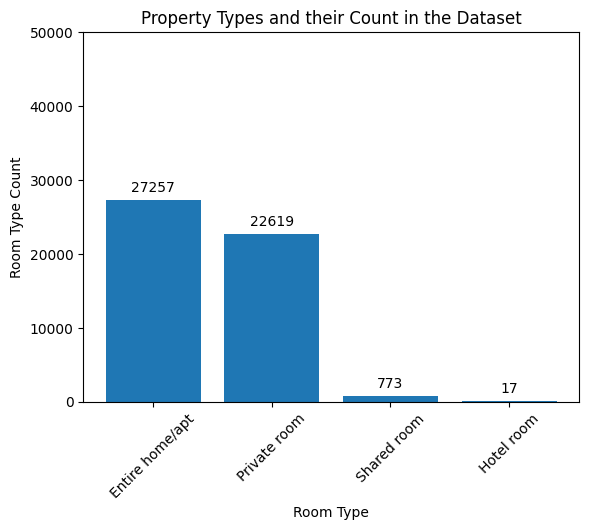

In [69]:

# 1. Create the bar chart
room_type_bar = plt.bar(property_types['room type'], property_types['count'])

# 2. Add labels on top of bars
plt.bar_label(room_type_bar, labels=property_types['count'], padding=4)

# 3. Set y-axis limit (optional)
plt.ylim([0, 50000])

# 4. Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their Count in the Dataset')

# 5. Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# 6. Show the plot
plt.show()


In [73]:
# Count neighbourhood group and convert to DataFrame
hood_group = df['neighbourhood group'].value_counts().to_frame()

# Rename the column for clarity
hood_group.rename(columns={'neighbourhood group': 'count'}, inplace=True)

# Reset index so the group names become a column
hood_group.reset_index(inplace=True)
hood_group.rename(columns={'index': 'neighbourhood group'}, inplace=True)

# Display the result
print(hood_group)


  neighbourhood group  count
0            Brooklyn  22370
1           Manhattan  20363
2              Queens   6120
3               Bronx   1349
4       Staten Island    464


In [71]:
neighbourhood_counts = df['neighbourhood group'].value_counts().to_frame()
neighbourhood_counts.rename(columns={'neighbourhood group': 'count'}, inplace=True)
neighbourhood_counts.reset_index(inplace=True)
neighbourhood_counts.rename(columns={'index': 'neighbourhood group'}, inplace=True)


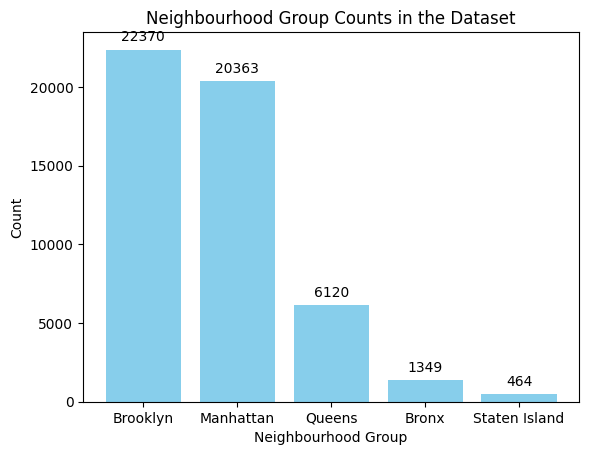

In [72]:
# 2. Plot the bar chart
neigh_bar = plt.bar(neighbourhood_counts['neighbourhood group'], neighbourhood_counts['count'], color='skyblue')

# 3. Add labels on top of bars
plt.bar_label(neigh_bar, labels=neighbourhood_counts['count'], padding=4)

# 4. Set labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Group Counts in the Dataset')

# 5. Optional: rotate x-axis labels for readability
plt.xticks(rotation=0)

# 6. Show the plot
plt.show()

#### #which neighborhoods group have the highest average prices for Airbnb listings?

In [75]:
# 1️⃣ Check all column names
print(df.columns)

# 2️⃣ Strip spaces and make lowercase for consistency
df.columns = df.columns.str.strip().str.lower()

# 3️⃣ Check again
print(df.columns)

# 4️⃣ Now try grouping using the correct column names
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
print(avg_price)


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')
Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')
                     price_$
neighbourhood group    

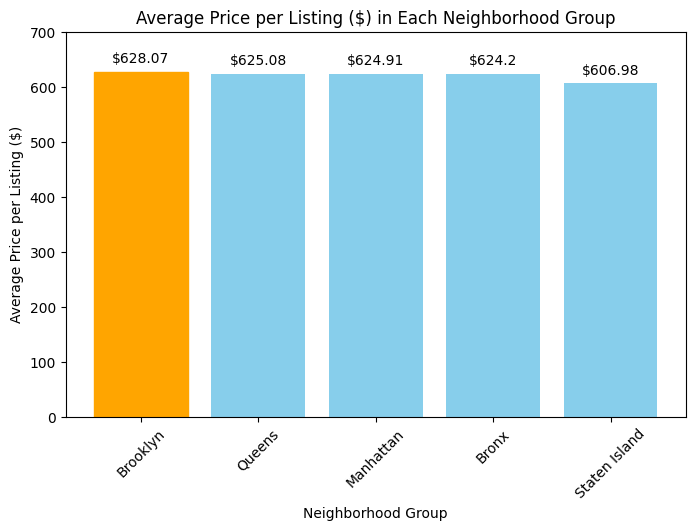

In [76]:

# Plot a bar chart
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(avg_price.index, avg_price['price_$'], color='skyblue')

# Highlight the highest price in a different color
bars[0].set_color('orange')  # Brooklyn is the highest

# Add labels on top of bars
ax.bar_label(bars, labels=[f"${round(x,2)}" for x in avg_price['price_$']], label_type='edge', padding=4)

# Axis labels and title
plt.ylim([0,700])
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price per Listing ($)")
plt.xticks(rotation=45)
plt.title("Average Price per Listing ($) in Each Neighborhood Group")

plt.show()


#### Is there a relationship between the construction year of property and price?

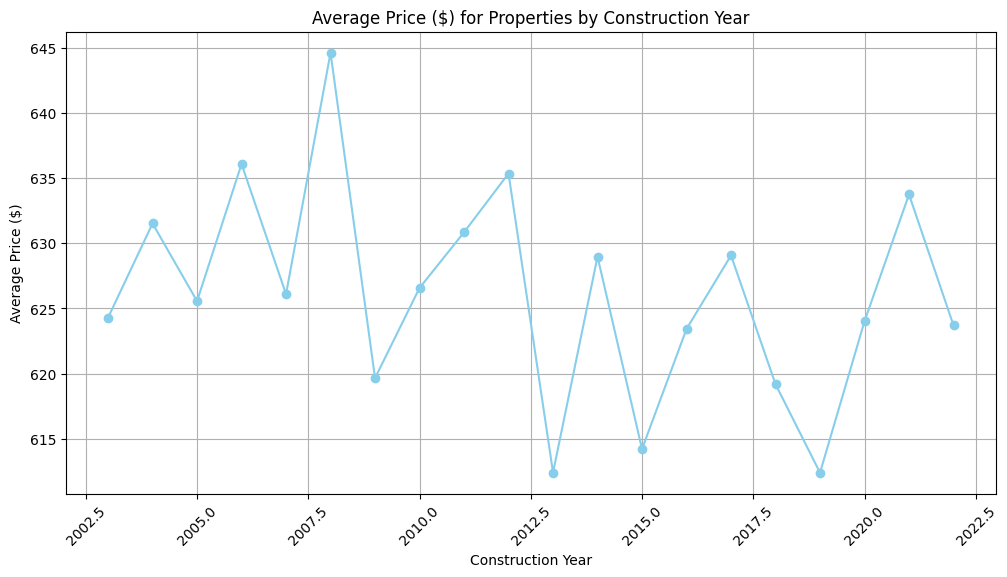

In [77]:
# Step 1: Group by Construction Year and calculate average price
avg_price_by_year = df.groupby('construction year')['price_$'].mean().to_frame()

# Step 2: Reset index for plotting
avg_price_by_year = avg_price_by_year.reset_index()

# Step 3: Plot
plt.figure(figsize=(12,6))
plt.plot(avg_price_by_year['construction year'], avg_price_by_year['price_$'], marker='o', linestyle='-', color='skyblue')

# Step 4: Labels and title
plt.xlabel("Construction Year")
plt.ylabel("Average Price ($)")
plt.title("Average Price ($) for Properties by Construction Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### who are the top 10 hosts by calculated host listing count?

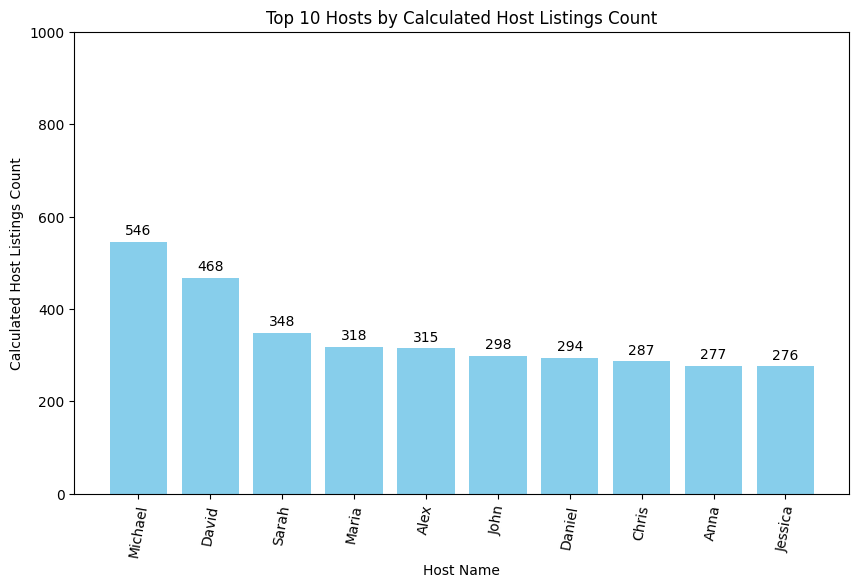

In [79]:

# Step 1: Group by host name and sum the listing counts
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

# Step 2: Plot bar chart
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(hosts.index, hosts['calculated host listings count'], color='skyblue')

# Step 3: Add labels on top of bars
ax.bar_label(bars, labels=[f"{int(x)}" for x in hosts['calculated host listings count']], label_type='edge', padding=3)

# Step 4: Labels, title, rotation, and limits
plt.xlabel("Host Name")
plt.ylabel("Calculated Host Listings Count")
plt.xticks(rotation=80)
plt.ylim(0, 1000)
plt.title("Top 10 Hosts by Calculated Host Listings Count")
plt.show()


#### Are hosts with verified identities more likely to receive positive reviews?

In [80]:
# Step 1: Group by host_identity_verified and calculate mean review rate
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

# Step 2: Display the result
print(review)


                        review rate number
host_identity_verified                    
verified                              3.25
unconfirmed                           3.25


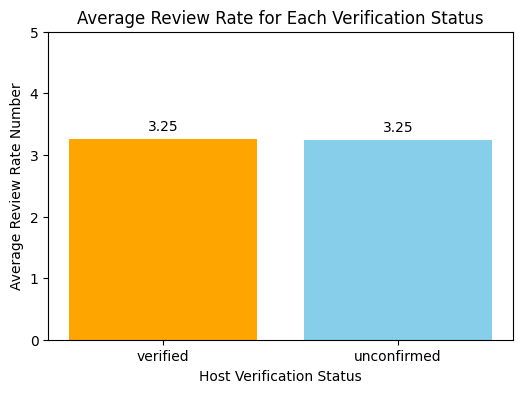

In [82]:
# Bar plot
fig, ax = plt.subplots(figsize=(6,4))
review_bar = ax.bar(review.index, review['review rate number'], color=['orange', 'skyblue'])

# Add labels on top of bars
ax.bar_label(review_bar, labels=[round(x,2) for x in review['review rate number']], padding=4)

# Set axis limits, labels, and title
plt.ylim(0, 5)  # review ratings are usually 0-5
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review Rate for Each Verification Status")

plt.show()


#### Is there a correlation between the price of a listing and its service fee?

In [84]:
#Calculate correlation
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"Correlation between price and service fee: {correlation:.2f}")

Correlation between price and service fee: 1.00


plt.figure(figsize=(8,6))
sns.regplot(x='price_$', y='service_fee_$', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.title("Regression Plot: Price vs Service Fee")
plt.show()

#### what is the average review rate number (e-g-, stars) for listings, and does it vary based on the neighborhood group and room type?

In [86]:
# Step 1: Group by neighborhood group and room type
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()

# Step 2: Rename column for clarity
ARRN.rename(columns={'review rate number':'average_review_rate'}, inplace=True)

# Step 3: Display the result
print(ARRN)


                                     average_review_rate
neighbourhood group room type                           
Bronx               Entire home/apt                 3.43
                    Private room                    3.36
                    Shared room                     3.37
Brooklyn            Entire home/apt                 3.24
                    Hotel room                      3.00
                    Private room                    3.24
                    Shared room                     3.28
Manhattan           Entire home/apt                 3.23
                    Hotel room                      3.64
                    Private room                    3.26
                    Shared room                     3.11
Queens              Entire home/apt                 3.31
                    Hotel room                      5.00
                    Private room                    3.28
                    Shared room                     3.22
Staten Island       Entire home

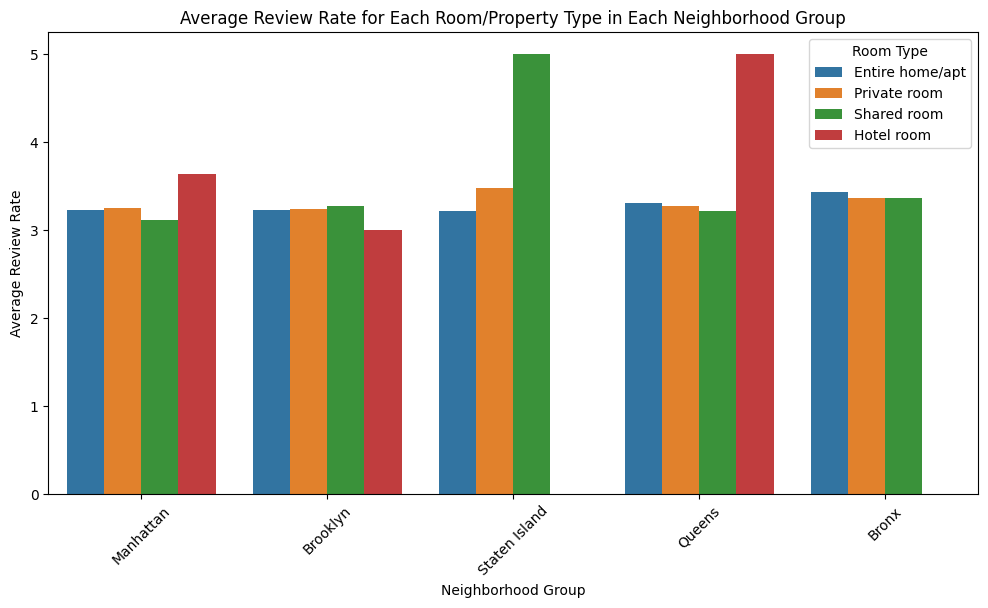

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='neighbourhood group',
    y='review rate number',
    hue='room type',
    errorbar=None  # replaces ci=None
)

# Labels and title
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Review Rate")
plt.title("Average Review Rate for Each Room/Property Type in Each Neighborhood Group")
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()


#### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

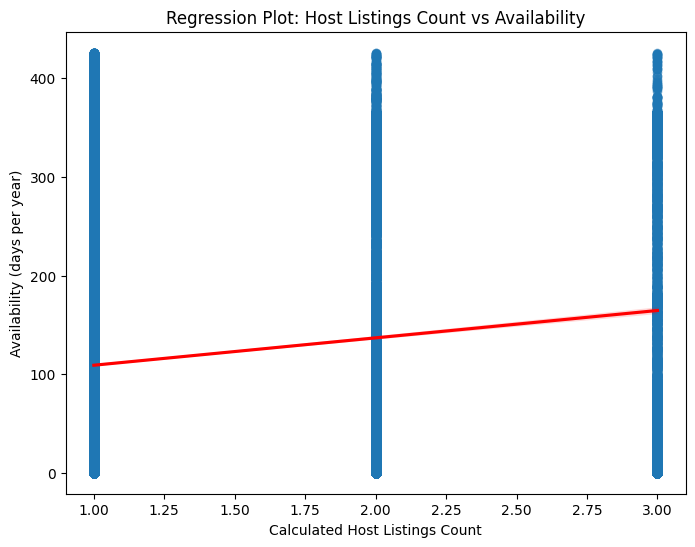

In [90]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='calculated host listings count',
    y='availability 365',
    scatter_kws={'alpha':0.5},  # semi-transparent points
    line_kws={'color':'red'}    # regression line in red
)

# Labels and title
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Availability (days per year)")
plt.title("Regression Plot: Host Listings Count vs Availability")

plt.show()

In [91]:
# Calculate correlation
correlation = df['calculated host listings count'].corr(df['availability 365'])
print(f"Correlation between listings count and availability: {correlation:.2f}")


Correlation between listings count and availability: 0.13


Correlation value range: -1 to 1

Positive correlation (0 to 1): as listings count increases, availability tends to increase.

Negative correlation (-1 to 0): as listings count increases, availability tends to decrease.

Close to 0: little to no linear relationship.

### Saving 

In [100]:
import pickle

# Save your cleaned DataFrame to a variable in notebook
clean_data_pickle = pickle.dumps(df)  # stores it in memory

# To reload it later
df_cleaned = pickle.loads(clean_data_pickle)
df_cleaned.head()


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.75,-73.97,United States,...,2013.00,577.00,115.00,3.00,74.00,22-06-2019,0.59,3.00,1.00,374.00
1,1007411,Beautiful 1br on Upper West Side,18824631834,verified,Alan,Manhattan,Upper West Side,40.80,-73.97,United States,...,2008.00,606.00,121.00,5.00,53.00,22-06-2019,0.43,4.00,1.00,163.00
2,1024533,Beautiful Sunny Park Slope Brooklyn,50357575975,verified,Alina,Brooklyn,South Slope,40.66,-73.98,United States,...,2020.00,370.00,74.00,3.00,15.00,27-05-2019,0.39,2.00,1.00,33.00
3,1025637,West Side Retreat,55430108992,unconfirmed,Alford,Manhattan,Upper West Side,40.79,-73.98,United States,...,2017.00,856.00,171.00,4.00,81.00,16-06-2019,0.69,3.00,1.00,86.00
4,1074240,Stylish & Sleek Apartment Near SoHo!,24559680874,verified,Brooke,Manhattan,East Village,40.72,-73.99,United States,...,2006.00,329.00,66.00,5.00,73.00,25-06-2019,0.66,4.00,1.00,13.00
